# Using Gensim to create word embeddings.
In this notebook we will use Gensim to create word embeddings from a corpus.

Word embedding are just fantastic. In a nutshell, they map words to vectors. And with vectors, as we all know, you can do math. 

- [Wikipedia: Word Embedding](https://en.wikipedia.org/wiki/Word_embedding).

---

Firstly, we download the corpus. We download the entire Harry Potter collection. Feel free, to use your own corpus.

## Import all necessary modules.

In [1]:
import os
import multiprocessing
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from src.get_sentences import Sentences
from src.plot_similar import plot_similarities

[nltk_data] Downloading package punkt to /Users/zewen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Train Gensim.

Here we feed all the text data into Gensim to train Word2Vec.

- [Gensim homepage](https://radimrehurek.com/gensim/).
- [Wikipedia: Word2Vec](https://en.wikipedia.org/wiki/Word2vec).

In [2]:
folder_path = "./dataset"
files_list = os.listdir(folder_path)
txt_files_list = [file for file in files_list if file.startswith("Book")]

# Create the sentences loader.
sentences = Sentences(folder_path, txt_files_list)

# Create the model.
model = Word2Vec(
    sg=1,
    vector_size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count())

# Build the vocabulary.
model.build_vocab(sentences)

# Train the model.
model.train(corpus_iterable=sentences, total_examples=model.corpus_count, epochs=5)

print("Done.")

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Done.


## Find most similar words.

With vectors it is easy to find the nearest neighbours.

Note: Feel free to experiment with your own words.

In [3]:
model.wv.most_similar("expelliarmus", topn=20)

[('protego', 0.8702800273895264),
 ('stupefy', 0.8636590242385864),
 ('avada', 0.8532301187515259),
 ('stupefyl', 0.8519583940505981),
 ('kedavrav', 0.8505242466926575),
 ('accio', 0.844334065914154),
 ('imperiol', 0.8420194983482361),
 ('slashing', 0.8413812518119812),
 ('kedavra', 0.8262999653816223),
 ('expelliarmusv', 0.8243761658668518),
 ('stinging', 0.8243557810783386),
 ('conquer', 0.8228141069412231),
 ('rebounded', 0.818793773651123),
 ('backfired', 0.8163565993309021),
 ('finite', 0.8154311776161194),
 ('cruciol', 0.811217188835144),
 ('connecting', 0.8095710873603821),
 ('encircling', 0.8082945942878723),
 ('impedimental', 0.8068548440933228),
 ('bead', 0.8064091801643372)]

## Plot word similarities.

That was just one word. Let us generate a similarity matrix of a lot of words. Again, use your own.

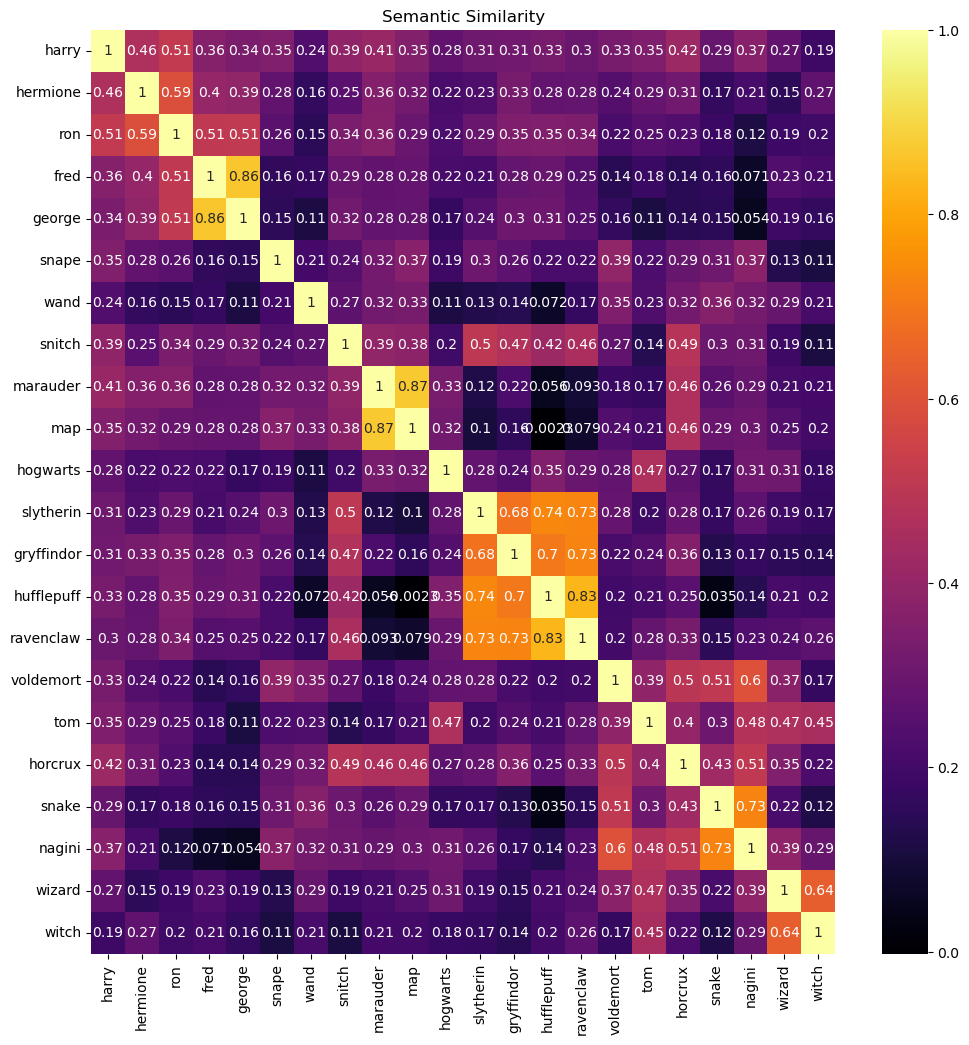

In [4]:
words = [
    "harry",
    "hermione",
    "ron",
    "fred",
    "george",
    "snape",
    "wand",
    "snitch",
    "marauder",
    "map",
    "hogwarts",
    "slytherin",
    "gryffindor",
    "hufflepuff",
    "ravenclaw",
    "voldemort",
    "tom",
    "horcrux",
    "snake",
    "nagini",
    "wizard",
    "witch"
]
plot_similarities(words,model)